In [38]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os

import matplotlib.animation as animation
import glob, re

import scienceplots

plt.style.use('default')
plt.style.use(['science', 'high-vis', 'grid'])

In [39]:
# Get lastly created folder in a directory
def get_last_folder(dir):
    list_of_subfolders = [f.path for f in os.scandir(dir) if f.is_dir()]
    latest_subfolder = max(list_of_subfolders, key=os.path.getmtime)
    return latest_subfolder

In [40]:
PSO_DIR = get_last_folder("../build/results_pso/")
SA_DIR = get_last_folder("../build/results_sa/")
print("PSO_DIR: ", PSO_DIR)
print("SA_DIR: ", SA_DIR)

PSO_History = np.loadtxt(PSO_DIR + "/global_swarm.csv", delimiter=",", skiprows=1)
SA_History = np.loadtxt(SA_DIR + "/history_optimization.csv", delimiter=",", skiprows=1)
print(PSO_History.shape)
PSO_NbIter = PSO_History.shape[0]
PSO_NbCol = PSO_History.shape[1]
PSO_Iter = PSO_History[:,0]
PSO_Cost = PSO_History[:,-1]

SA_NbIter = SA_History.shape[0]
SA_NbCol = SA_History.shape[1]
SA_Iter = SA_History[:,0]
SA_Cost = SA_History[:,1]
SA_Temp = SA_History[:,2]

min_ok_pso = np.argmax(PSO_Cost<1e3)
PSO_Cost = PSO_Cost[min_ok_pso::]
PSO_Iter = PSO_Iter[min_ok_pso::]
min_ok_sa = np.argmax(SA_Cost<1e3)
SA_Cost = SA_Cost[min_ok_sa::]
SA_Iter = SA_Iter[min_ok_sa::]
SA_Temp = SA_Temp[min_ok_sa::]

PSO_DIR:  ../build/results_pso/2023-02-23_10-40-16
SA_DIR:  ../build/results_sa/2023-02-23_09-30-55
(202, 9)


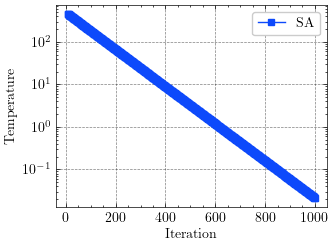

In [41]:
fig, ax = plt.subplots(1,1)
ax.plot(SA_Iter, SA_Temp, 's-', label="SA", markersize=4)
ax.set_xlabel("Iteration")
ax.set_ylabel("Temperature")
ax.legend()
ax.set_yscale("log")
plt.savefig("sa_temperature.pdf", dpi=300)


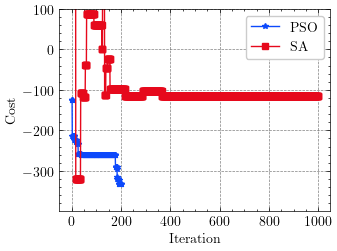

In [42]:
fig, ax = plt.subplots(1,1)
ax.plot(PSO_Iter, PSO_Cost, '*-', label="PSO", markersize=4)
ax.plot(SA_Iter, SA_Cost, 's-', label="SA", markersize=4)
ax.set_xlabel("Iteration")
ax.set_ylabel("Cost")
ax.set_ylim(bottom=None, top=1e2)
ax.legend()
plt.savefig("cost_func.pdf", dpi=300)

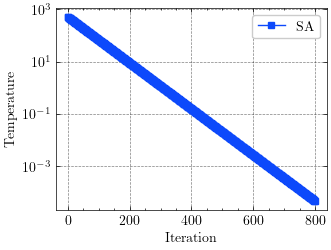

In [43]:
def temp_geom(max_iter, T0, alpha)->list:
    T = np.zeros(max_iter)
    T[0] = T0
    for i in range(1, max_iter):
        T[i] = T[i-1] * alpha
    return T

MaxIter = 800
T0 = 500
alpha = 0.98
T = temp_geom(MaxIter, T0, alpha)
# plot temperature
fig, ax = plt.subplots(1,1)
ax.plot(np.arange(MaxIter), T, 's-', label="SA", markersize=4)
ax.set_xlabel("Iteration")
ax.set_ylabel("Temperature")
ax.legend()
ax.set_yscale("log")
